# Atividade Prática: Análise de Objetos no Espaço
### Autor: Sanderson Carlos Ribeiro
***

## Objetivo:
Aplicar os conhecimentos adquiridos no curso para explorar a região de um objeto no espaço
usando dados do Dark Energy Survey (DES).

# PROJETO

## Bibliotecas

In [1]:
# BIBLIOTECAS
import matplotlib.pyplot as plt # Para os gráficos
import pandas as pd
import numpy as np

# !pip install astropy # (execute se não tiver instalado o astropy - o símbolo ! serve para usar o pip dentro do ambiente jupyter notebook)
from astropy import units as u
from astropy.coordinates import SkyCoord

# !pip install dblinea # (execute se não tiver instalado o dblinea)
from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

## Conexão com o banco de dados do Dark Energy Survey (Data Release 2)

In [2]:
# Conexão com o banco de dados:
db = DBBase()
schema = "des_dr2"  
tablename = "main"

### Para ver os nomes das colunas (dados dos objetos)

In [3]:
db.get_table_columns(tablename, schema=schema)

['coadd_object_id',
 'tilename',
 'hpix_32',
 'hpix_64',
 'hpix_1024',
 'hpix_4096',
 'hpix_16384',
 'ra',
 'dec',
 'alphawin_j2000',
 'deltawin_j2000',
 'galactic_l',
 'galactic_b',
 'xwin_image',
 'ywin_image',
 'a_image',
 'erra_image',
 'b_image',
 'errb_image',
 'theta_j2000',
 'errtheta_image',
 'kron_radius',
 'ebv_sfd98',
 'mag_auto_g_dered',
 'mag_auto_r_dered',
 'mag_auto_i_dered',
 'mag_auto_z_dered',
 'mag_auto_y_dered',
 'wavg_mag_psf_g_dered',
 'wavg_mag_psf_r_dered',
 'wavg_mag_psf_i_dered',
 'wavg_mag_psf_z_dered',
 'wavg_mag_psf_y_dered',
 'extended_class_coadd',
 'extended_class_wavg',
 'flags_g',
 'imaflags_iso_g',
 'nepochs_g',
 'flags_r',
 'imaflags_iso_r',
 'nepochs_r',
 'flags_i',
 'imaflags_iso_i',
 'nepochs_i',
 'flags_z',
 'imaflags_iso_z',
 'nepochs_z',
 'flags_y',
 'imaflags_iso_y',
 'nepochs_y',
 'xwin_image_g',
 'xwin_image_r',
 'xwin_image_i',
 'xwin_image_z',
 'xwin_image_y',
 'ywin_image_g',
 'ywin_image_r',
 'ywin_image_i',
 'ywin_image_z',
 'ywin_imag

### Para ver o tipo de dado das colunas (INTEGER, DOUBLE_PRECISION...)

In [4]:
db.describe_table(tablename, schema=schema)

[{'name': 'coadd_object_id', 'type': BIGINT()},
 {'name': 'tilename', 'type': TEXT()},
 {'name': 'hpix_32', 'type': BIGINT()},
 {'name': 'hpix_64', 'type': BIGINT()},
 {'name': 'hpix_1024', 'type': BIGINT()},
 {'name': 'hpix_4096', 'type': BIGINT()},
 {'name': 'hpix_16384', 'type': BIGINT()},
 {'name': 'ra', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'dec', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'alphawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'deltawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_l', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_b', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'xwin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'ywin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'a_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'erra_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'b_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'n

## Consultando objetos com o `fetchall()`.

Usamos o método `fetchall()` para acessar os dados e retornar uma lista de tuplas de acordo com a nossa consulta (`query`)

In [5]:
query = "SELECT coadd_object_id, ra, dec FROM des_dr2.main limit 23" # Consulta a id, ascensão reta e declinação no banco de dados dos 23 primeiros objetos
lista_23_objetos = db.fetchall(query) # Cria a lista
lista_23_objetos # Exibe a lista

[(1529220421, 76.914089, -46.937152),
 (1529220121, 76.918024, -46.934654),
 (1529220129, 76.914734, -46.934679),
 (1529220385, 76.912989, -46.936798),
 (1529220066, 76.911689, -46.934485),
 (1529220084, 76.923009, -46.934203),
 (1529220030, 76.923706, -46.933679),
 (1529219643, 76.925857, -46.930103),
 (1529219488, 76.928655, -46.928536),
 (1529219566, 76.923838, -46.929452),
 (1529219765, 76.914751, -46.931326),
 (1529219555, 76.917888, -46.929348),
 (1529219479, 76.916135, -46.928507),
 (1529220398, 76.909361, -46.936984),
 (1529220397, 76.907985, -46.937036),
 (1529220003, 76.908264, -46.933537),
 (1529220238, 76.903278, -46.935588),
 (1529220083, 76.906557, -46.934334),
 (1529220054, 76.905308, -46.93399),
 (1529220622, 76.897438, -46.939186),
 (1529220533, 76.894698, -46.938354),
 (1529220347, 76.894753, -46.936537),
 (1529220197, 76.897951, -46.935249)]

O método `fetchall_dict()` faz a consulta no banco de dados e retorna uma lista de dicionários com os dados referentes ao seu argumento pré-definido. No nosso caso chamado de `query`.

In [6]:
dict_23_objetos = db.fetchall_dict(query) # Cria uma lista de dicionários
dict_23_objetos # Exibe a lista

[{'coadd_object_id': 1529220421, 'ra': 76.914089, 'dec': -46.937152},
 {'coadd_object_id': 1529220121, 'ra': 76.918024, 'dec': -46.934654},
 {'coadd_object_id': 1529220129, 'ra': 76.914734, 'dec': -46.934679},
 {'coadd_object_id': 1529220385, 'ra': 76.912989, 'dec': -46.936798},
 {'coadd_object_id': 1529220066, 'ra': 76.911689, 'dec': -46.934485},
 {'coadd_object_id': 1529220084, 'ra': 76.923009, 'dec': -46.934203},
 {'coadd_object_id': 1529220030, 'ra': 76.923706, 'dec': -46.933679},
 {'coadd_object_id': 1529219643, 'ra': 76.925857, 'dec': -46.930103},
 {'coadd_object_id': 1529219488, 'ra': 76.928655, 'dec': -46.928536},
 {'coadd_object_id': 1529219566, 'ra': 76.923838, 'dec': -46.929452},
 {'coadd_object_id': 1529219765, 'ra': 76.914751, 'dec': -46.931326},
 {'coadd_object_id': 1529219555, 'ra': 76.917888, 'dec': -46.929348},
 {'coadd_object_id': 1529219479, 'ra': 76.916135, 'dec': -46.928507},
 {'coadd_object_id': 1529220398, 'ra': 76.909361, 'dec': -46.936984},
 {'coadd_object_id':

O método `fetchall_df()` faz a consulta no banco de dados e retorna um objeto do tipo pandas.DataFrame com os dados referentes ao seu argumento que definimos como `query`.

In [7]:
dataframe_23_objetos = db.fetchall_df(query)
dataframe_23_objetos

,coadd_object_id,ra,dec
0,1529220421,76.914089,-46.937152
1,1529220121,76.918024,-46.934654
2,1529220129,76.914734,-46.934679
3,1529220385,76.912989,-46.936798
4,1529220066,76.911689,-46.934485
5,1529220084,76.923009,-46.934203
6,1529220030,76.923706,-46.933679
7,1529219643,76.925857,-46.930103
8,1529219488,76.928655,-46.928536
9,1529219566,76.923838,-46.929452


## Escolha do Objeto.

Para ilustrar a visualização de uma pequena amostra de dados, vamos construir o diagrama cor-magnitude com as estrelas da [galáxia de Cartwheel](https://en.wikipedia.org/wiki/Cartwheel_Galaxy) também chamada de galáxia da Roda de Carro ou ESO 350-40. 

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Cartwheel_Galaxy_JWST_NIRCam%2BMIRI_Full_Res.png/1024px-Cartwheel_Galaxy_JWST_NIRCam%2BMIRI_Full_Res.png" 
         width="300" 
         style="background-color:white; padding: 20px;">
</div>


|Coordenadas Equatoriais| |
|:-- |--- | 
|Ascensão Reta| 00h 37m 41.1s |
|Declinação| −33° 42' 59" |

### Conversão das unidades para graus

Precisamos converter as unidades para graus para realizarmos a busca no banco de dados. Para tal usamos a classe `SkyCoord` do módulo `astropy.coordinate`.

In [8]:
c = SkyCoord('00h37m41.1s', '-33d42m59s', frame='icrs')
c  

<SkyCoord (ICRS): (ra, dec) in deg
    (9.42125, -33.71638889)>

In [9]:
print(f"(Ascensão Reta) ra: {c.ra.deg:.1f} graus")
print(f"(Declinação) dec: {c.dec.deg:.1f} graus")

(Ascensão Reta) ra: 9.4 graus
(Declinação) dec: -33.7 graus


Os graus estão de acordo com o intervalo que foi pedido no enunciado do Projeto

**1. Escolha do Objeto:**
Selecione uma região do céu observada pelo DES com Ascensão Reta entre 0 e 60
e Declinação entre -30 e -60.

## Coleta de Dados

### Seleção da região (retangular)

Vamos selecionar as magnitudes de uma amostra de estrelas em uma região "quadrada" (na esfera celeste) de lado igual a 1 grau, ou seja, com uma margem de 0.5 graus em torno da posição do nosso objeto. 

**Posição do nosso objeto em graus:** ra=9.4 e dec=-33.7

Nesse caso temos uma região delimitada pelos seguintes vértices:

**Vértices (ra, dec)**: (8.9, -34.2), (9.9, -34.2), (9.9, -33.2), (8.9, -33.2)

Represento a seguir o retângulo criado nessa região do céu de forma ilustrativa.

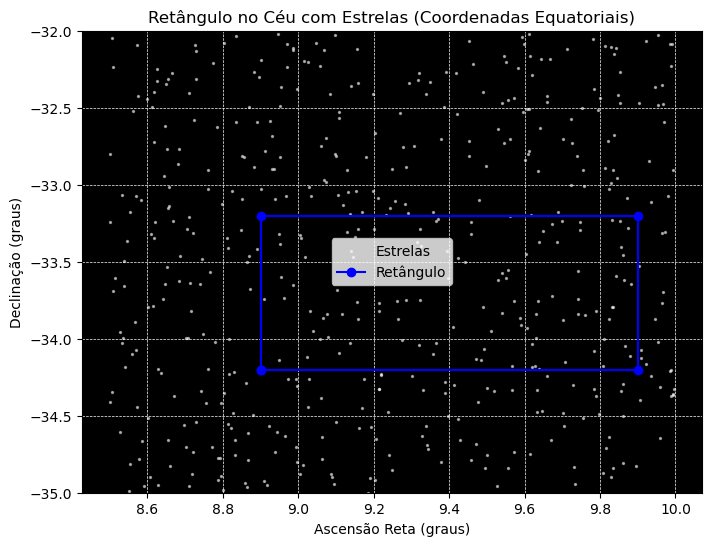

In [10]:
# Definindo os vértices do retângulo (com o ponto repetido para fechar o retângulo)
ra = [8.9, 9.9, 9.9, 8.9, 8.9]  # Ascensão Reta (com o primeiro ponto repetido)
dec = [-34.2, -34.2, -33.2, -33.2, -34.2]  # Declinação (com o primeiro ponto repetido)
# O primeiro ponto se repete para fechar o retângulo

# Criando o gráfico
plt.figure(figsize=(8, 6))

# Adicionando o fundo com estrelas
num_stars = 500  # Número de estrelas aleatórias
star_ra = np.random.uniform(8.5, 10, num_stars)  # Ascensão reta das estrelas
star_dec = np.random.uniform(-35, -32, num_stars)  # Declinação das estrelas

# Plotando as estrelas
plt.scatter(star_ra, star_dec, color='white', s=2, alpha=0.5, label="Estrelas")  # Estrelas no fundo

# Plotando o retângulo com a ascensão reta e declinação
plt.plot(ra, dec, marker='o', linestyle='-', color='b', label='Retângulo')

# Adicionando título e rótulos
plt.title("Retângulo no Céu com Estrelas (Coordenadas Equatoriais)")
plt.xlabel("Ascensão Reta (graus)")
plt.ylabel("Declinação (graus)")

# Definindo os limites do gráfico para melhor visualização
plt.ylim(-35, -32)

# Exibindo a legenda
plt.legend()

# Adicionando o fundo preto (como o céu)
plt.gca().set_facecolor('black')

# Mostrando o gráfico
plt.grid(True, color='white', linestyle='--', linewidth=0.5)
plt.show()

In [11]:
query_CG = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[8.9, -34.2, 9.9, -34.2, 9.9, -33.2, 8.9, -33.2]) AND extended_class_coadd < 2 "        
query_CG

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[8.9, -34.2, 9.9, -34.2, 9.9, -33.2, 8.9, -33.2]) AND extended_class_coadd < 2 '

In [12]:
dados_CarGalaxy = db.fetchall_df(query_CG) # Pode demorar um pouco essa célula 

In [13]:
dados_CarGalaxy 

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083233115,8.903303,-34.192051,2,17.879395,16.674522,16.257225,0.000783,0.000364,0.000379
1,1083233647,8.902043,-34.189657,0,25.366838,24.550381,24.269382,0.250888,0.159499,0.230430
2,1083233351,8.905861,-34.186896,0,24.855618,24.986763,25.513369,0.217783,0.320519,0.954277
3,1083233747,8.908578,-34.190648,0,25.208752,24.304001,23.731756,0.224688,0.121410,0.137622
4,1083233505,8.933983,-34.188525,0,25.905296,25.928194,24.846287,0.296523,0.396488,0.268696
...,...,...,...,...,...,...,...,...,...,...
17329,1089000368,9.863413,-33.200720,0,26.582672,24.825117,23.534851,0.864837,0.226918,0.124092
17330,1089000230,9.877740,-33.200315,0,20.859892,20.692837,20.333115,0.006648,0.007543,0.009411
17331,1089001337,9.893602,-33.211317,0,25.040827,24.395540,23.649338,0.267318,0.208549,0.200091
17332,1089000789,9.896873,-33.205633,0,25.487259,24.966320,24.441868,0.237043,0.207459,0.228496


In [14]:
dados_CarGalaxy.head() # Primeiros 5 linhas de dados apenas

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083233115,8.903303,-34.192051,2,17.879395,16.674522,16.257225,0.000783,0.000364,0.000379
1,1083233647,8.902043,-34.189657,0,25.366838,24.550381,24.269382,0.250888,0.159499,0.230430
2,1083233351,8.905861,-34.186896,0,24.855618,24.986763,25.513369,0.217783,0.320519,0.954277
3,1083233747,8.908578,-34.190648,0,25.208752,24.304001,23.731756,0.224688,0.121410,0.137622
4,1083233505,8.933983,-34.188525,0,25.905296,25.928194,24.846287,0.296523,0.396488,0.268696


### Seleção da região (circular)

Para selecionar uma região circular, basta informar as coordenadas do centro da seleção e um raio (em graus) nos argumentos da função `q3c_radial_query()`. Para um diâmetro de 1 grau, a query ficaria assim:

```sql
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i, 
FROM des_dr2.main 
WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5)
AND extended_class_coadd < 2 
````

Representação da região circular (meramente ilustrativa):

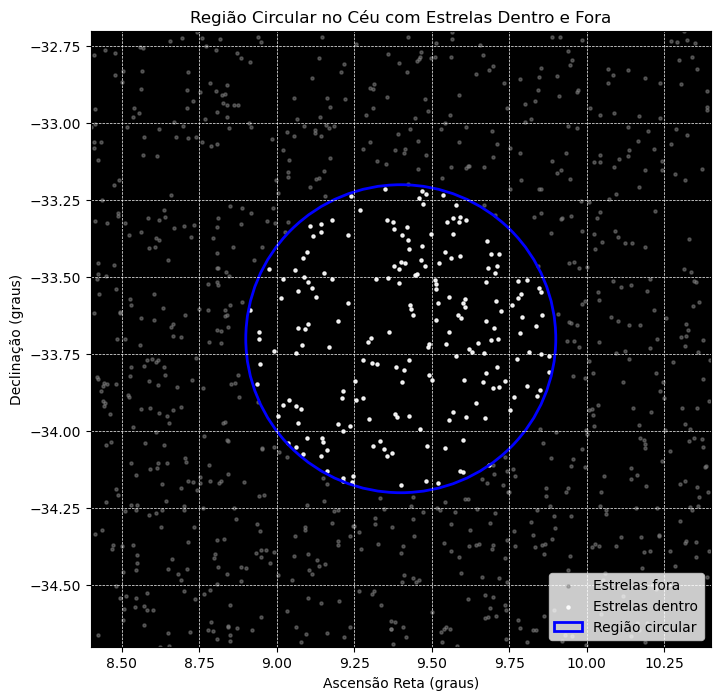

In [15]:
# Definições da região
ra_center = 9.4  # Ascensão Reta do centro
dec_center = -33.7  # Declinação do centro
radius = 0.5  # Raio do círculo em graus

# Gerar estrelas para todo o plano (incluindo fora do círculo)
num_stars_total = 1000  # Número total de estrelas
ra_stars = np.random.uniform(ra_center - 2 * radius, ra_center + 2 * radius, num_stars_total)
dec_stars = np.random.uniform(dec_center - 2 * radius, dec_center + 2 * radius, num_stars_total)

# Identificar estrelas dentro do círculo
inside_mask = np.sqrt((ra_stars - ra_center) ** 2 + (dec_stars - dec_center) ** 2) <= radius

# Separar as estrelas dentro e fora do círculo
ra_stars_inside = ra_stars[inside_mask]
dec_stars_inside = dec_stars[inside_mask]
ra_stars_outside = ra_stars[~inside_mask]
dec_stars_outside = dec_stars[~inside_mask]

# Criar o gráfico
plt.figure(figsize=(8, 8))

# Estrelas fora do círculo
plt.scatter(ra_stars_outside, dec_stars_outside, color='gray', s=5, alpha=0.5, label="Estrelas fora")

# Estrelas dentro do círculo
plt.scatter(ra_stars_inside, dec_stars_inside, color='white', s=5, alpha=0.9, label="Estrelas dentro")

# Desenhar o círculo da região
circle = plt.Circle((ra_center, dec_center), radius, color='blue', fill=False, linewidth=2, label="Região circular")
plt.gca().add_artist(circle)

# Ajustar o gráfico
plt.title("Região Circular no Céu com Estrelas Dentro e Fora")
plt.xlabel("Ascensão Reta (graus)")
plt.ylabel("Declinação (graus)")
plt.xlim(ra_center - 2 * radius, ra_center + 2 * radius)
plt.ylim(dec_center - 2 * radius, dec_center + 2 * radius)

# Adicionar fundo preto e grade
plt.gca().set_facecolor('black')
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Exibir legenda
plt.legend()

# Mostrar o gráfico
plt.show()


In [16]:
query_circle = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5) AND extended_class_coadd < 2 "
query_circle    

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 9.4, -33.7, 0.5) AND extended_class_coadd < 2 '

In [17]:
Dados_Cartwheel_Circle = db.fetchall_df(query_circle)

In [18]:
Dados_Cartwheel_Circle

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737
...,...,...,...,...,...,...,...,...,...,...
16192,1089011569,9.760322,-33.317063,0,25.390100,24.974436,24.463120,0.399654,0.376492,0.451997
16193,1089010989,9.753170,-33.311335,0,26.228264,25.521381,26.119808,0.483894,0.352735,1.189051
16194,1089010613,9.762326,-33.307435,0,25.058712,23.656656,21.949173,0.287294,0.110276,0.041389
16195,1089011445,9.782738,-33.315795,0,25.039434,24.645456,24.586361,0.187337,0.180060,0.327748


In [19]:
Dados_Cartwheel_Circle.head() # Primeiros 5 linhas de dados apenas

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737


## Final da coleta de Dados
Dessa forma conclui o item 2 do Projeto

**2. Coleta de Dados:**

Use as coordenadas (declinação e ascensão reta) da região escolhida.
Acesse o banco de dados do DES através da infraestrutura do LIneA utilizando a
biblioteca dblinea. Lembre-se de que a biblioteca funciona apenas dentro da
infraestrutura do LIneA.
Colete os dados da região em torno do objeto selecionado.

## Armazenamento dos Dados

De acordo com o item 3 do Projeto

**3. Armazenamento dos Dados:**
    Salve os dados coletados em um arquivo CSV.

In [20]:
dados_CarGalaxy.to_csv('Dados_CartwheelGalaxyRectangle.csv', index=False)

In [21]:
Dados_Cartwheel_Circle.to_csv('Dados_CartwheelGalaxyCircle.csv', index=False)

Vamos agora prosseguir com a próxima etapa em um outro notebook, onde leremos esses arquivos .csv que foram gerados e vamos plotar certos gráficos para uma melhor visualização da análise dos dados.